<a href="https://colab.research.google.com/github/Pkemoi-Bett/Insider-Threat/blob/main/Feature_selection_for_all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
file_path = '/content/drive/My Drive/Insider Threat dataset/Anomaly Detection/'

Start of feature selection for All data Process
/content/drive/My Drive/Insider Threat dataset/Anomaly Detection/all importance list:
/content/drive/My Drive/Insider Threat dataset/Anomaly Detection/all 
                              importance
Features                               
Init_Win_bytes_forward         0.061544
Fwd IAT Max                    0.049150
Packet Length Std              0.044590
Subflow Fwd Bytes              0.043562
Total Length of Fwd Packets    0.040983
...                                 ...
Fwd Avg Packets/Bulk           0.000000
Fwd Avg Bytes/Bulk             0.000000
Bwd PSH Flags                  0.000000
ECE Flag Count                 0.000000
Bwd Avg Packets/Bulk           0.000000

[76 rows x 1 columns] 



/content/drive/My Drive/Insider Threat dataset/Anomaly Detection/all=["Init_Win_bytes_forward","Fwd IAT Max","Packet Length Std","Subflow Fwd Bytes","Total Length of Fwd Packets"]
--------------------------------------------------------------------

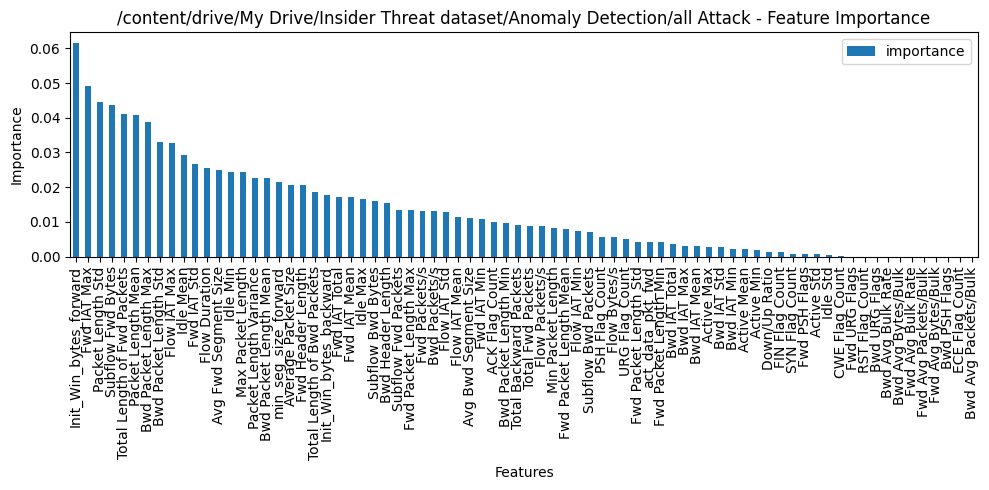

In [11]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn as sk
import time

seconds = time.time()

print("Start of feature selection for All data Process")

def folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")

csv_files = ["/content/drive/My Drive/Insider Threat dataset/Anomaly Detection/all_data.csv"]
#csv_files = ["all_data.csv"]
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

ths = open("importance_list_all_data.csv", "w")
folder("./feature_pics/")

for j in csv_files:
    # Extract attack type from the file name
    attack_type = j.split("_")[0] if "_" in j else "Unknown"

    # Read a random subset of the data (adjust the fraction as needed)
    df = pd.read_csv(j, usecols=main_labels).sample(frac=0.1, random_state=0)
    df = df.fillna(0)

    # Map labels to binary (1 for "BENIGN" and 0 for attacks)
    df["Label"] = df["Label"].apply(lambda x: 1 if x == "BENIGN" else 0)

    y = df["Label"].values
    X = df.drop("Label", axis=1).values

    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0

    # Reduce the number of trees in the random forest
    forest = sk.ensemble.RandomForestClassifier(n_estimators=50, random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_

    refclasscol = list(df.columns.values)
    impor_bars = pd.DataFrame({'Features': refclasscol[:-1], 'importance': importances})  # Exclude the "Label" column
    impor_bars = impor_bars.sort_values('importance', ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();

    count = 0
    fea_ture = attack_type + "=["
    for i in impor_bars.index:
        fea_ture = fea_ture + "\"" + str(i) + "\","
        count += 1
        if count == 5:
            fea_ture = fea_ture[:-1] + "]"
            break

    print(attack_type, "importance list:")
    print(attack_type, "\n", impor_bars, "\n\n\n")
    print(fea_ture)
    plt.title(attack_type + " Attack - Feature Importance")
    plt.ylabel('Importance')

   # plt.savefig("./feature_pics/" + attack_type + "_importance.pdf", bbox_inches='tight', orientation='portrait', format='pdf')

    plt.savefig("./feature_pics/" + attack_type.replace("/", "_") + "_importance.pdf", bbox_inches='tight', orientation='portrait', format='pdf')

    ths.write((fea_ture))
    plt.tight_layout()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

print("Feature Selection for all data is completed!")
print("Total operation time: = ", time.time() - seconds, "seconds")
ths.close()
